# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/data/vehicles_us.csv')
    
display(df.head(10))
df.shape

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


(51525, 13)

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


Notes:
* There are a considerable amount of NaN values in some of the columns like model_year, cylinders, odometer, paint_color.
* This may be a problem, as a large part of a car's price is determined by it's year and mileage
<br><br>
* The date-based columns are not in datetime format
* Model year shouldn't be a float
* Odometer should be an integer
* The "is_4wd" column is a flag column that has NaN's instead of 0's, should be an integer column
<br><br>
* The "is_4wd" column is a flag column that has NaN's instead of 0's, should be an integer column. 
* 1 represents the car having 4wd, and 0 should be no 4wd, but there are only NaN and 1 in the column
* This leads me to believe that the NaN's should be 0's
* In the columns that do have missing values, there are only about 3-4K each

### Conclusions and further steps

* The NaN values in the 4wd column should be cast as 0's
* We should drop the NaN values for now, we can undo the drop if it impedes our analysis
* Change the dtypes of the variables

## Treat missing values (if any)

In [5]:
# percentage of na per column
(df.isna().mean() * 100)[(df.isna().mean() * 100) != 0].apply(lambda x: '~' + str(int(round(x, 0))) + '%')

model_year      ~7%
cylinders      ~10%
odometer       ~15%
paint_color    ~18%
is_4wd         ~50%
dtype: object

In [6]:
condition_medians = df.groupby('condition').agg({'odometer': 'median'})
model_medians = df.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})
display(condition_medians)
display(model_medians)

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


,model_year,cylinders
model,,
acura tl,2007.0,6.0
bmw x5,2010.0,6.0
buick enclave,2012.0,6.0
cadillac escalade,2009.0,8.0
chevrolet camaro,2013.0,6.0
...,...,...
toyota sienna,2008.0,6.0
toyota tacoma,2010.0,6.0
toyota tundra,2009.0,8.0


In [7]:
df['is_4wd'] = df['is_4wd'].fillna(0)

for condition in condition_medians.index:
    df.loc[df['condition'] == condition, 'odometer'] = df.loc[df['condition'] == condition, 'odometer'].fillna(
        df[df['condition'] == condition]['odometer'].median()
    )

for model in model_medians.index:
    df.loc[df['model'] == model, 'model_year'] = df.loc[df['model'] == model, 'model_year'].fillna(
        df[df['model'] == model]['model_year'].median()
    )
    df.loc[df['model'] == model, 'cylinders'] = df.loc[df['model'] == model, 'cylinders'].fillna(
        df[df['model'] == model]['cylinders'].median()
    )

df['paint_color'] = df['paint_color'].fillna('unknown')

display(df)
df.isna().mean()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

## Fix data types

In [8]:
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['odometer'] = df['odometer'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(bool)
df['date_posted'] = pd.to_datetime(df['date_posted'])
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71


## Enrich data

In [9]:
# Add datetime values for when the ad was placed

# completed in the cell above

In [10]:
# Add the vehicle's age when the ad was placed

df['car_age'] = df['date_posted'].dt.year - df['model_year']

In [11]:
# Add the vehicle's average mileage per year

df['mileage_per_year'] = df['odometer'] / (df['car_age'] + 1)

In [12]:
pd.to_datetime(df['date_posted'])

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [13]:
condition_dict= {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

df['condition_cat'] = df['condition'].map(condition_dict)
df['week_posted'] = df['date_posted'].dt.week
df['month_posted'] = df['date_posted'].dt.month_name()
df['year_posted'] = df['date_posted'].dt.year

In [14]:
# It might help to replace the condition values with something that can be manipulated more easily

# I disagree, as coding the conditions to integers will make me forget which ones correspond to which strings, and I
# Will have to keep going back to check. I will encode them later if it is truly needed
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,mileage_per_year,condition_cat,week_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,18125.000000,2,25,June,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,11088.125000,2,42,October,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,15714.285714,4,6,February,2019
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,16,10683.117647,1,12,March,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,26967.666667,3,14,April,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,5,14689.333333,4,40,October,2018
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,16,10676.470588,0,46,November,2018
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,9,12800.000000,3,46,November,2018
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,5,23262.166667,2,27,July,2018


## Check clean data

In [15]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
price               51525 non-null int64
model_year          51525 non-null int64
model               51525 non-null object
condition           51525 non-null object
cylinders           51525 non-null int64
fuel                51525 non-null object
odometer            51525 non-null int64
transmission        51525 non-null object
type                51525 non-null object
paint_color         51525 non-null object
is_4wd              51525 non-null bool
date_posted         51525 non-null datetime64[ns]
days_listed         51525 non-null int64
car_age             51525 non-null int64
mileage_per_year    51525 non-null float64
condition_cat       51525 non-null int64
week_posted         51525 non-null int64
month_posted        51525 non-null object
year_posted         51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(9), object(7)
memory usage: 7.1+ MB


In [16]:
# print a sample of data

df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,mileage_per_year,condition_cat,week_posted,month_posted,year_posted
count,51525.000000,51525.000000,51525,51525,51525.000000,51525,51525.000000,51525,51525,51525,51525,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.000000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,13,2,354,NaN,NaN,NaN,NaN,NaN,12,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,False,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,October,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,25953,186,NaN,NaN,NaN,NaN,NaN,4643,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12132.464920,2009.793557,NaN,NaN,6.121067,NaN,115199.007278,NaN,NaN,NaN,NaN,NaN,39.55476,8.513906,15378.480570,2.637535,26.873498,NaN,2018.307462
std,10040.803015,6.099381,NaN,NaN,1.657457,NaN,60484.868232,NaN,NaN,NaN,NaN,NaN,28.20427,6.112976,11808.751864,0.712447,15.138854,NaN,0.461447
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,1.000000,NaN,2018.000000
25%,5000.000000,2007.000000,NaN,NaN,4.000000,NaN,75668.000000,NaN,NaN,NaN,NaN,NaN,19.00000,4.000000,9363.636364,2.000000,13.000000,NaN,2018.000000


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

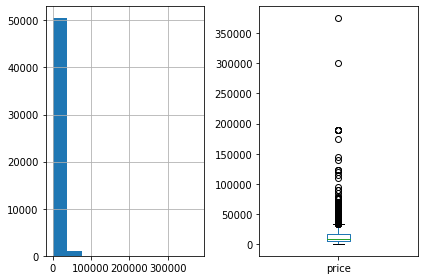

,price,model_year,model,condition,odometer,type,days_listed,mileage_per_year,condition_cat,week_posted,month_posted,year_posted
1309,189000,2014,ford f-150,good,151248,truck,56,25208.000000,2,9,March,2019
1326,79900,2008,ford f350,like new,10060,pickup,22,914.545455,4,29,July,2018
1668,189000,2014,ford f-150,good,151248,truck,21,25208.000000,2,12,March,2019


(26, 12)


,price,model_year,model,condition,odometer,type,days_listed,mileage_per_year,condition_cat,week_posted,month_posted,year_posted
count,26.000000,26.000000,26,26,26.000000,26,26.000000,26.000000,26.000000,26.000000,26,26.000000
unique,NaN,NaN,15,5,NaN,7,NaN,NaN,NaN,NaN,12,NaN
top,NaN,NaN,ford f-150,good,NaN,truck,NaN,NaN,NaN,NaN,March,NaN
freq,NaN,NaN,7,14,NaN,16,NaN,NaN,NaN,NaN,4,NaN
mean,143545.923077,2010.230769,NaN,NaN,106063.576923,NaN,39.192308,13478.439633,2.769231,25.192308,NaN,2018.346154
std,71683.148356,6.339134,NaN,NaN,74275.571572,NaN,23.270615,10004.522415,1.142198,14.656109,NaN,0.485165
min,76000.000000,1999.000000,NaN,NaN,35.000000,NaN,7.000000,1.842105,1.000000,4.000000,NaN,2018.000000
25%,90144.250000,2005.250000,NaN,NaN,9265.000000,NaN,21.250000,6460.421053,2.000000,12.250000,NaN,2018.000000
50%,123456.000000,2013.000000,NaN,NaN,129000.000000,NaN,32.000000,11284.060897,2.000000,26.000000,NaN,2018.000000
75%,189000.000000,2014.750000,NaN,NaN,151248.000000,NaN,54.500000,25208.000000,3.750000,35.500000,NaN,2019.000000


In [17]:
# price

plt.subplot(1, 2, 1)
df['price'].hist()
plt.subplot(1, 2, 2)
df['price'].plot(kind='box')
plt.tight_layout()
plt.show()

display(df[df['price'] > 75000].drop(['cylinders', 'fuel', 'transmission', 'paint_color', 'is_4wd', 'date_posted', 'car_age'], axis=1).head(3))
print(df[df['price'] > 75000].drop(['cylinders', 'fuel', 'transmission', 'paint_color', 'is_4wd', 'date_posted', 'car_age'], axis=1).shape)
df[df['price'] > 75000].drop(['cylinders', 'fuel', 'transmission', 'paint_color', 'is_4wd', 'date_posted', 'car_age'], axis=1).describe(include='all')

* by inspecting the price and the attributes of the cars with a price > 100000, it can be justified that we can 
* drop the outliers. After a price of ~75000, the most frequent car is a ford f-150 with good condition and ~120,000 miles
* This price is way to high in reality and may skew the results of our analysis

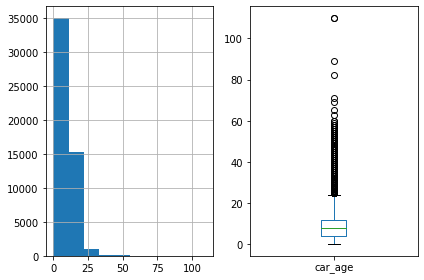

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,mileage_per_year,condition_cat,week_posted,month_posted,year_posted
10018,23900,1955,ford f250,excellent,6,gas,47180,manual,truck,blue,False,2018-12-22,61,63,737.187500,3,51,December,2018
14752,15000,1954,ford f-150,excellent,8,gas,3565,manual,pickup,black,False,2019-02-16,13,65,54.015152,3,7,February,2019
22595,21000,1948,chevrolet impala,like new,8,gas,4000,automatic,sedan,red,False,2019-01-18,24,71,55.555556,4,3,January,2019
33906,12995,1908,gmc yukon,good,8,gas,169328,automatic,SUV,black,False,2018-07-06,34,110,1525.477477,2,27,July,2018
33907,12995,1908,cadillac escalade,excellent,8,gas,104230,automatic,SUV,white,False,2018-06-24,25,110,939.009009,3,25,June,2018
34713,5000,1936,ford f-150,excellent,6,gas,30000,manual,pickup,purple,False,2018-11-22,10,82,361.445783,3,47,November,2018
36582,44900,1949,chevrolet suburban,good,8,gas,1800,automatic,wagon,orange,False,2018-08-19,10,69,25.714286,2,33,August,2018
45694,18000,1929,ford f-150,good,8,gas,129000,manual,other,silver,False,2018-11-18,59,89,1433.333333,2,46,November,2018


In [18]:
# vehicle age

plt.subplot(1, 2, 1)
df['car_age'].hist()
plt.subplot(1, 2, 2)
df['car_age'].plot(kind='box')
plt.tight_layout()
plt.show()

df[df['car_age'] > 60]

# there are very few amount of cars that are significantly old, but there is only one car (1908 gmc yukon) that doesn't exist
# we can drop this row and keep the rest

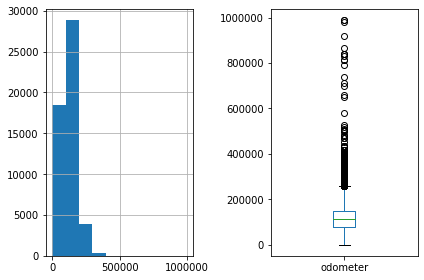

Stats for price where odometer > 300,000 
---
Mean: 6890.839721254355 
Std: 6115.863680187818


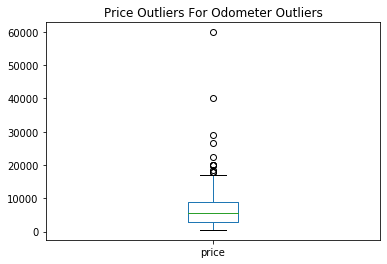

In [19]:
# mileage

plt.subplot(1, 2, 1)
df['odometer'].hist()
plt.subplot(1, 2, 2)
df['odometer'].plot(kind='box')
plt.tight_layout()
plt.show()

print('Stats for price where odometer > 300,000', '\n---')
print('Mean:', df[(df['odometer'] > 300000)]['price'].mean(), '\nStd:', df[df['odometer'] > 300000]['price'].std())
df[(df['odometer'] > 300000)]['price'].plot(kind='box')
plt.title('Price Outliers For Odometer Outliers')
plt.show()

# It seems like there are a lot of outliers for the odometer column, but the values make sense because cars are allowed
# to have a high odometer. Looking at the mean and std of the price where the odometer is an outlier matches the real-life
# value that we'd expect for the car. When we look at the price where the odometer is considered and outlier, 
# there are only 6 prices that don't make sense with the high odometer number. 
# We can remove these 6 rows and keep the rest

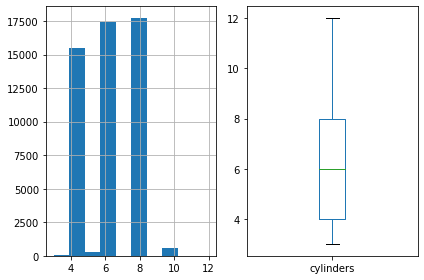

3        34
4     15499
5       294
6     17435
8     17712
10      549
12        2
Name: cylinders, dtype: int64

In [20]:
# number of cylinders

plt.subplot(1, 2, 1)
df['cylinders'].hist()
plt.subplot(1, 2, 2)
df['cylinders'].plot(kind='box')
plt.tight_layout()
plt.show()

df['cylinders'].value_counts().sort_index()

# there are no outliers in the cylinders column and the values make sense

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

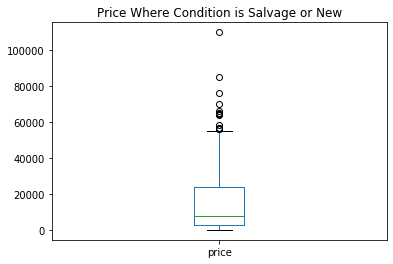

In [21]:
# condition

display(df['condition'].value_counts())
df[df['condition'].isin(['salvage', 'new'])]['price'].plot(kind='box')
plt.title('Price Where Condition is Salvage or New')
plt.show()

# there is nothing out of place in the condition column

* Determine the lower limits for outliers

* With price in mind, there are no columns that have lower outliers

* Determine the upper limits for outliers

* for the car price, we can drop all rows > 75,000
* for car age, we can drop all rows (there is just one) with car_age > 100
* for mileage, we can drop all rows where odometer > 300,000 and price > 17,000
* for cylinders and condition, there is no action to be taken

In [24]:
# Store data without outliers in a separate DataFrame

df_clean = df[(df['price'] < 75000) & (df['car_age'] < 100) & (df['odometer'] < 300000)]
print('Dropped rows:', df.shape[0] - df_clean.shape[0])
print(df_clean.shape)
df_clean.head(3)

Dropped rows: 339
(51186, 19)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,mileage_per_year,condition_cat,week_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,18125.000000,2,25,June,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,11088.125000,2,42,October,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,15714.285714,4,6,February,2019


## Study core parameters without outliers

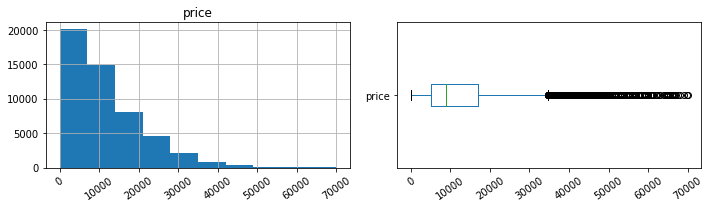

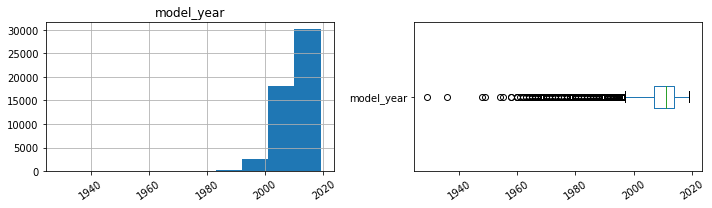

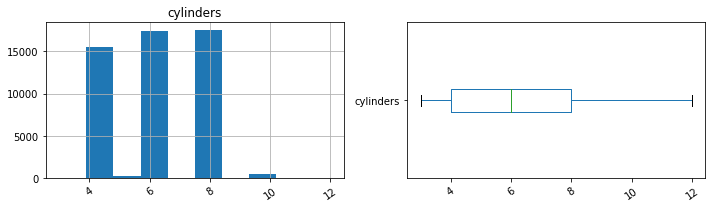

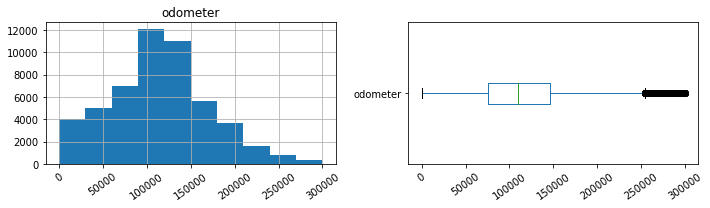

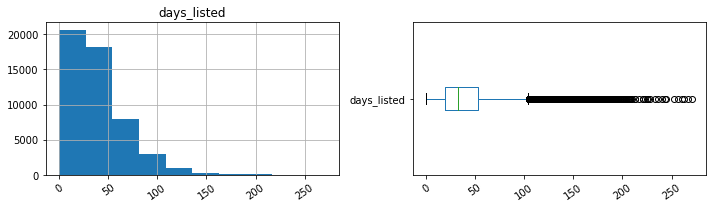

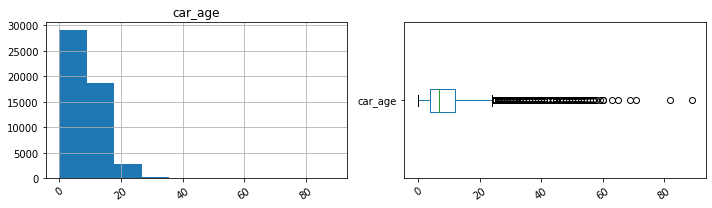

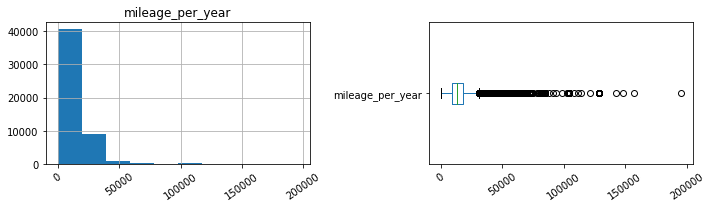

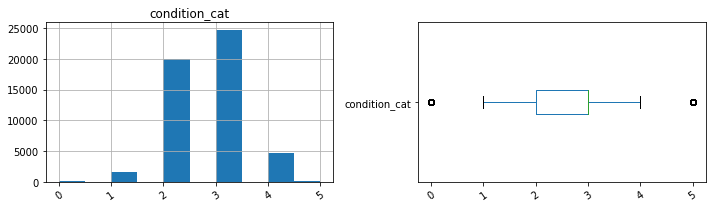

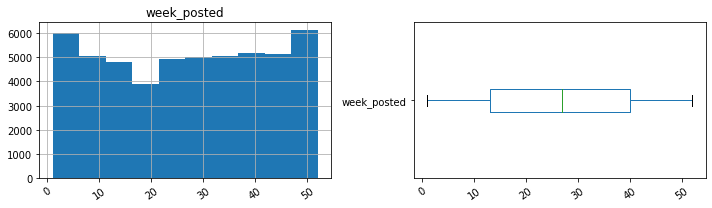

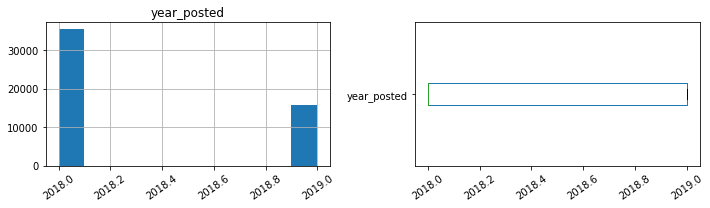

In [25]:
# the data makes more sense in real-life context now that we've filtered it. Skewed, fake, or false data can distort our 
# analysis, and now that we've filtered the outliers and data that doesn't make sense, the distributions
# of each column make more sense

for i, col in enumerate(df_clean.columns):
    if df_clean[col].dtype in [int, float]:
        
        plt.figure(figsize=(10,3))
        plt.subplot(1, 2, 1)
        df_clean[col].hist()
        plt.title(col)
        plt.xticks(rotation=35)
        
        plt.subplot(1, 2, 2)
        df_clean[col].plot(kind='box', vert=False)
        plt.tight_layout()
        plt.xticks(rotation=35)
        plt.show()

In [26]:
df_clean.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,mileage_per_year,condition_cat,week_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,18125.000,2,25,June,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,11088.125,2,42,October,2018


In [27]:
print('Mean and Std for Days Listed\n---')
print(df_clean['days_listed'].mean(), df_clean['days_listed'].median())

# looking at the histogram for days listed, it seems like after 150 days there are very little cars that sold
# we will use 100 and 150 for abnormally long times to sell. Since the majority of cars are sold in under 25 days, there
# aren't any values that would be abnormally low. For this reason, we will look at cars that sold in under a week

print('\nLonger than 150 days listed\n---')
display(df[(df['days_listed'] > 150)]['model'].value_counts().head())
print('\nShorter than 7 days listed\n---')
display(df[(df['days_listed'] < 7)]['model'].value_counts().head())

# It seems like the chevy silverado (base edition) and the toyota camry and prius were the models that were listed the
# longest, while the ram 1500, honda accord, and  chevy silverado 2500hd were sold the quickest. 
# the chevy silverado 1500 and the ford f-150 were both sold quickly and slowly

Mean and Std for Days Listed
---
39.55618723869808 33.0

Longer than 150 days listed
---


ford f-150                  10
chevrolet silverado 1500     9
chevrolet silverado          8
dodge grand caravan          7
gmc sierra 1500              6
Name: model, dtype: int64


Shorter than 7 days listed
---


ford f-150                  136
chevrolet silverado 1500     99
ram 1500                     78
honda accord                 61
chevrolet silverado          60
Name: model, dtype: int64

## Average price per each type of vehicle

,mean price,count
type,,
SUV,11151.095600,12364
truck,16643.238525,12200


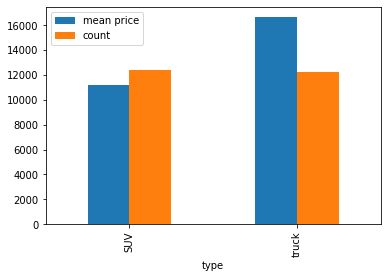

In [28]:
ads = df_clean[['type', 'price']].groupby('type').agg(['mean', 'count']).rename(columns={'mean': 'mean price'})
ads.columns = ads.columns.droplevel()
ads = ads.sort_values('count', ascending=False).head(2)
display(ads)
ads.plot(kind='bar')
plt.show()

# trucks and suv's have the highest number of ads

## Price factors

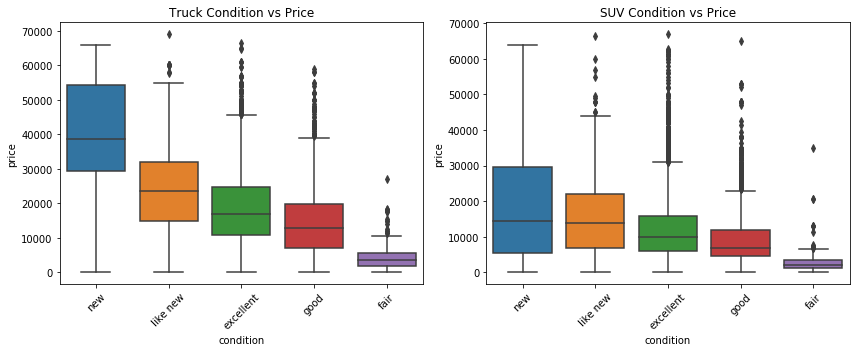

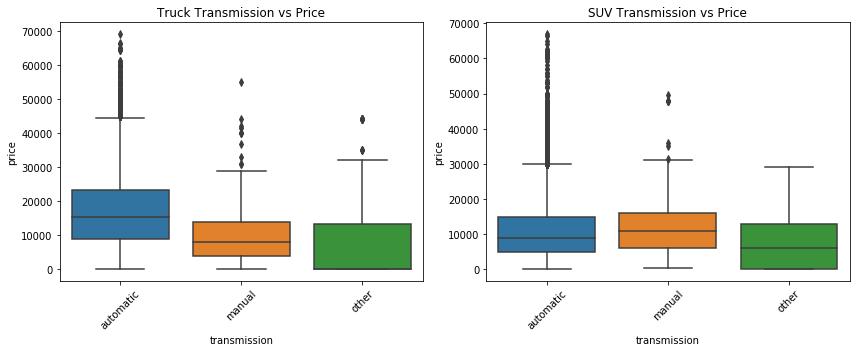

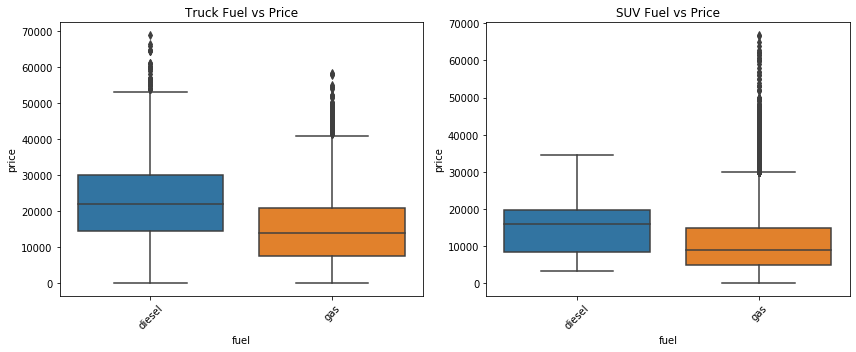

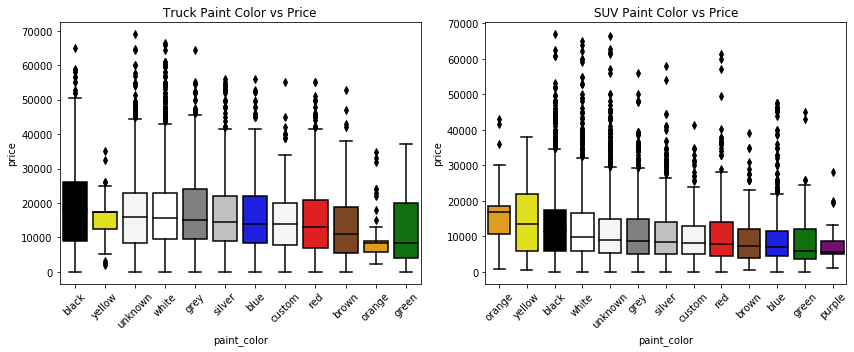

In [29]:
# we are interested in seeing how each qualitative variable interacts with price, so we are going to 
# subset our data to SUV's and trucks and see the boxplot for price for each column

# df_popular = df_clean[df_clean['type'].isin(['truck', 'SUV'])]
df_truck = df_clean[df_clean['type'] == 'truck']
df_suv = df_clean[df_clean['type'] == 'SUV']


# Condition
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(x="condition", y="price", 
            data=df_truck, order=[x for x in df_truck.groupby('condition')['price'].median().sort_values(ascending=False).index if df_truck['condition'].value_counts()[x] >= 25])
plt.xticks(rotation=45)
plt.title('Truck Condition vs Price')

plt.subplot(1, 2, 2)
sns.boxplot(x="condition", y="price", 
            data=df_suv, order=[x for x in df_truck.groupby('condition')['price'].median().sort_values(ascending=False).index if df_truck['condition'].value_counts()[x] >= 25])
plt.xticks(rotation=45)
plt.title('SUV Condition vs Price')
plt.tight_layout()
plt.show()


# Transmission
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(x="transmission", y="price", 
            data=df_truck, order=[x for x in df_truck.groupby('transmission')['price'].median().sort_values(ascending=False).index if df_truck['transmission'].value_counts()[x] >= 25])
plt.xticks(rotation=45)
plt.title('Truck Transmission vs Price')

plt.subplot(1, 2, 2)
sns.boxplot(x="transmission", y="price", 
            data=df_suv, order=[x for x in df_truck.groupby('transmission')['price'].median().sort_values(ascending=False).index if df_truck['transmission'].value_counts()[x] >= 25])
plt.xticks(rotation=45)
plt.title('SUV Transmission vs Price')
plt.tight_layout()
plt.show()


# Fuel
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(x="fuel", y="price", 
            data=df_truck, order=[x for x in df_truck.groupby('fuel')['price'].median().sort_values(ascending=False).index if df_truck['fuel'].value_counts()[x] >= 25])
plt.xticks(rotation=45)
plt.title('Truck Fuel vs Price')

plt.subplot(1, 2, 2)
sns.boxplot(x="fuel", y="price", 
            data=df_suv, order=[x for x in df_truck.groupby('fuel')['price'].median().sort_values(ascending=False).index if df_truck['fuel'].value_counts()[x] >= 25])
plt.xticks(rotation=45)
plt.title('SUV Fuel vs Price')
plt.tight_layout()
plt.show()


# Paint Color
colors = {
    c: c for c in df_suv['paint_color'].unique() if c not in ['unknown', 'custom']
}
colors['unknown'] = 'whitesmoke'
colors['custom'] = 'whitesmoke'
colors['brown'] = 'saddlebrown'

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(x="paint_color", y="price", 
            data=df_truck, order=[x for x in df_truck.groupby('paint_color')['price'].median().sort_values(ascending=False).index if df_truck['paint_color'].value_counts()[x] >= 25],
           palette=colors)
plt.xticks(rotation=45)
plt.title('Truck Paint Color vs Price')

plt.subplot(1, 2, 2)
sns.boxplot(x="paint_color", y="price", 
            data=df_suv, order=[x for x in df_suv.groupby('paint_color')['price'].median().sort_values(ascending=False).index if df_suv['paint_color'].value_counts()[x] >= 25],
           palette=colors)
plt.xticks(rotation=45)
plt.title('SUV Paint Color vs Price')
plt.tight_layout()
plt.show()

* Only the categories with more than 50 observations were kept and displayed in the boxplots
<br><br>
* Our findings from the plot - a comparison of SUV's and trucks:
    * The truck condition is more strongly correlated with price than SUV condition.
        * They follow the same category order of rising price
    * Automatic trucks are the most expensive trucks, while manual SUV's are the most expensive SUV's
    * Diesel is the most expensive type of car, with the gap being smaller for SUV's than trucks
    * SUV's and trucks both have different orders of colors that are the most expensive
        * Black, white, and grey are both in the top 5 for both types of cars

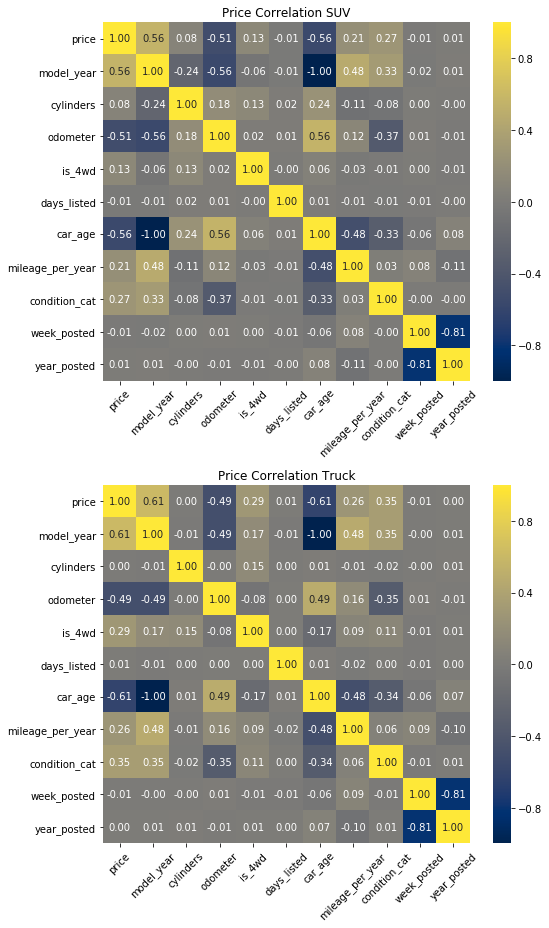

In [30]:
import seaborn as sns

plt.figure(figsize=(8, 13))
plt.subplot(2, 1, 1)
sns.heatmap(df_suv.corr(), annot=True, cmap='cividis', fmt='.2f')
plt.title('Price Correlation SUV')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.heatmap(df_truck.corr(), annot=True, cmap='cividis', fmt='.2f')
plt.title('Price Correlation Truck')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* it seems like there is only ever a mildly positive or negative correlation between price and the other quantitative columns
* model year and odometer/car age have the highest and lowest correlation with price, respectively, for both truck and SUV

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

* After loading the dataset, the most apparent thing about it was the number of values that were missing.
* Of the original ~50,000 rows, only ~30,000 were left after we dropped the rows with missing values.
* This wasn't a big problem, as we were able to conduct our analysis accordingly on the ~30,000 rows
<br><br>
* I tackled the outliers next, because examining the distributions of each of the variables showed a great number of outliers
* The columns that were filtered:
    * for the car price, we dropped all rows > 75,000
    * for car age, we dropped all rows (there was just one) where the age of the car > 100
    * for mileage, we dropped all rows where the mileage > 300,000
* looking at the distributions after removing the outliers revealed a more compact graph that would ensure better analysis
<br><br>
* Next, I examined what the makeup of cars were when they sold either very quickly or slowly.
* Looking at the model of the car, some were shown to sell the quickest and the slowest
    * The chevy silverado (base edition) and the toyota camry and prius were the models that were sold the slowest
    * The ram 1500, honda accord, and  chevy silverado 2500hd were sold the quickest. 
    * the chevy silverado 1500 and the ford f-150 were both sold quickly and slowly
<br><br>
* The last step was drilling down and seeing the exact interaction between each variable and the price, 
* since we are interested in seeing which factors influence the price of a vehicle.
* The truck and the SUV were the most popular type of cars, so we subsetted our data to analyze on these types of cars
* In summary, our findings from the plots - in each of the categories, these labels move positively with the prices:
    * condition: like new has the highest median price
    * transmission: automatic has the highest price, but not by a lot
    * fuel: diesel cars are significantly more expensive than gas cars
    * color: there isn't one particular color that is more expensive than the rest
* with regards to the numerical categories, there was only ever a mildly positive or negative correlation 
* between price and the other quantitative columns.
* model year and odometer have the highest and lowest correlation with price, respectively
<br><br>
* Overall, we could have made a stronger prediction of price if we had more attributes related to cars. 
* With the data we did have, there seemed to be the strongest association 
* between ("like-new condition", "diesel fuel", "SUV and truck types", "year of the car", "odometer") and the price of the car